# Analysis of Clustering Techniques on Customer data 

### K Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('C:\\Users\\chira\\Downloads\\train_mall.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [3]:
# Select the attributes to use for clustering
attributes = ['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']
X = df[attributes]

In [4]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [7]:
le=LabelEncoder()
df[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation']] = df[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation']].apply(le.fit_transform)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,3441,1,0,4,0,5,1,2,3,3,3
1,3292,0,1,18,1,2,15,0,2,3,0
2,6571,0,1,44,1,2,1,2,0,5,1
3,2469,1,1,44,1,7,0,1,1,5,1
4,3315,0,1,20,1,3,15,1,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...
8063,4525,1,0,4,0,9,0,2,6,0,3
8064,5130,1,0,15,0,4,3,2,3,3,3
8065,5754,0,0,14,1,5,1,2,0,5,3
8066,7461,0,0,8,1,5,1,2,3,5,1


In [8]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [9]:
# Normalize the data
X = (df - df.mean()) / df.std()

In [10]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

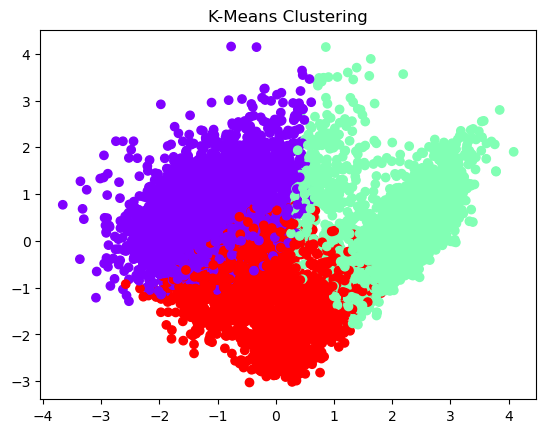

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('K-Means Clustering')
plt.show()

In [13]:
!pip install scikit-learn-extra

### K Medoid Clustering

In [14]:
from sklearn_extra.cluster import KMedoids

In [15]:
# Perform K-Medoids clustering
kmedoids_instance = KMedoids(n_clusters=3, random_state=42)
kmedoids_instance.fit(X)

KMedoids(n_clusters=3, random_state=42)

In [16]:
# Fit the model
kmeans_clusters = kmeans.fit_predict(X)

In [16]:
# Get the cluster labels
labels = kmedoids_instance.labels_

In [17]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

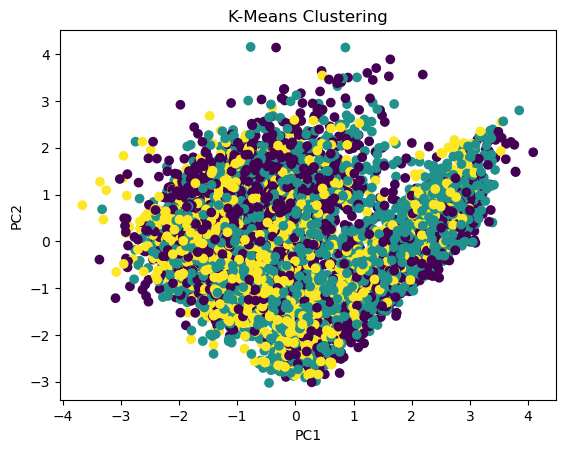

In [19]:
# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.show()

### Hirerical Clustering 

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [22]:
# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([7560, 6509, 7897, ...,    5,    2,    0], dtype=int64)

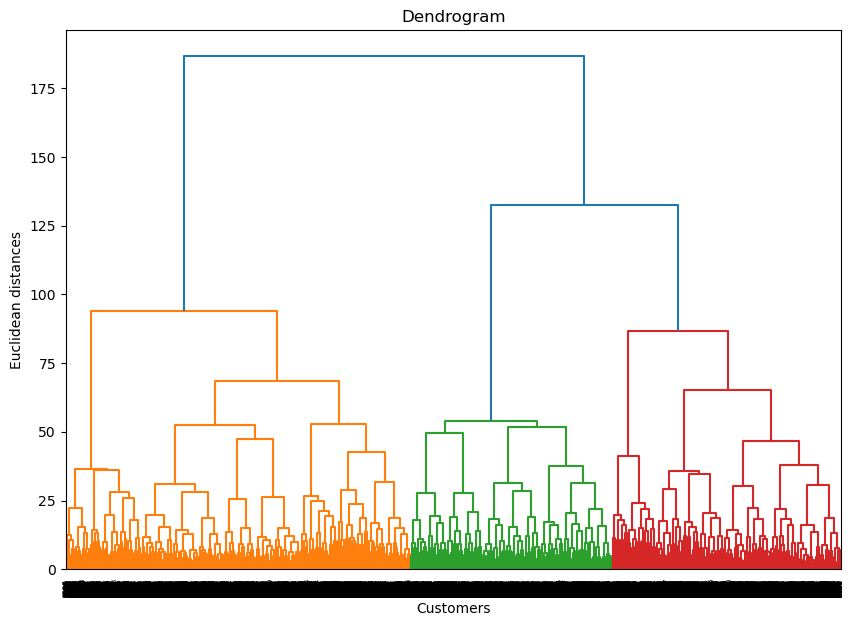

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage(data_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [24]:
# Choose an appropriate number of clusters based on the dendrogram
num_clusters = 5

In [25]:
# Perform hierarchical clustering with the chosen number of clusters
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(data_scaled)

In [26]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

In [27]:
# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
pca_df['Cluster'] = labels

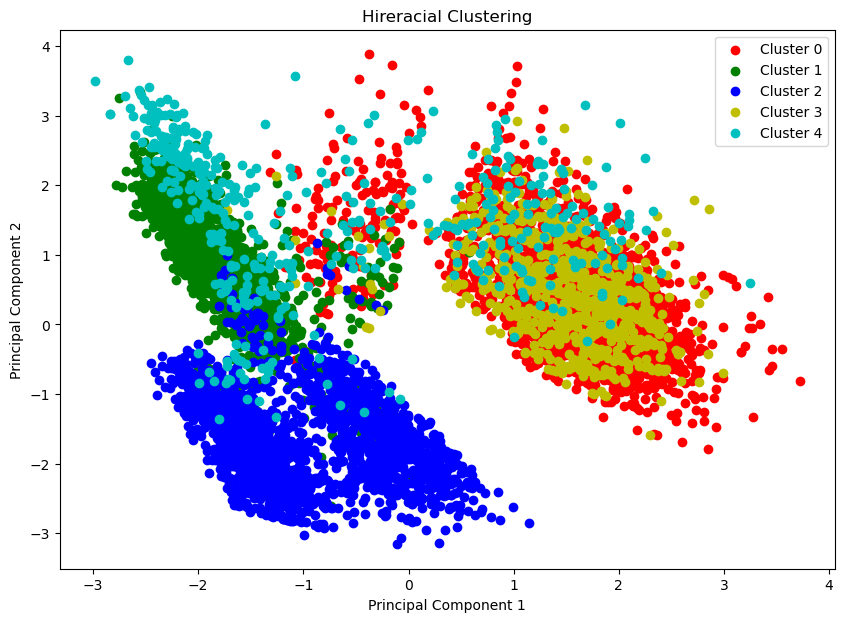

In [28]:
# Plot the scatter plot
plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(num_clusters):
    plt.scatter(pca_df.loc[pca_df['Cluster'] == i, 'principal component 1'],
                pca_df.loc[pca_df['Cluster'] == i, 'principal component 2'],
                c=colors[i], label=f'Cluster {i}')
plt.title("Hireracial Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Comparision of K Means, K Medoid, Hireracial Clustering

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

In [30]:
# Load the dataset
data = pd.read_csv("C:\\Users\\chira\\Downloads\\train_mall.csv")

In [31]:
# Preprocess the data
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation']] = data[['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation']].apply(le.fit_transform)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [32]:
# Choose an appropriate number of clusters
num_clusters = 5

In [33]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Perform K-Medoids clustering
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42)
kmedoids_labels = kmedoids.fit_predict(data_scaled)

# Perform Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_scaled)

In [34]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

In [35]:
# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
pca_df['KMeans'] = kmeans_labels
pca_df['KMedoids'] = kmedoids_labels
pca_df['Hierarchical'] = hierarchical_labels

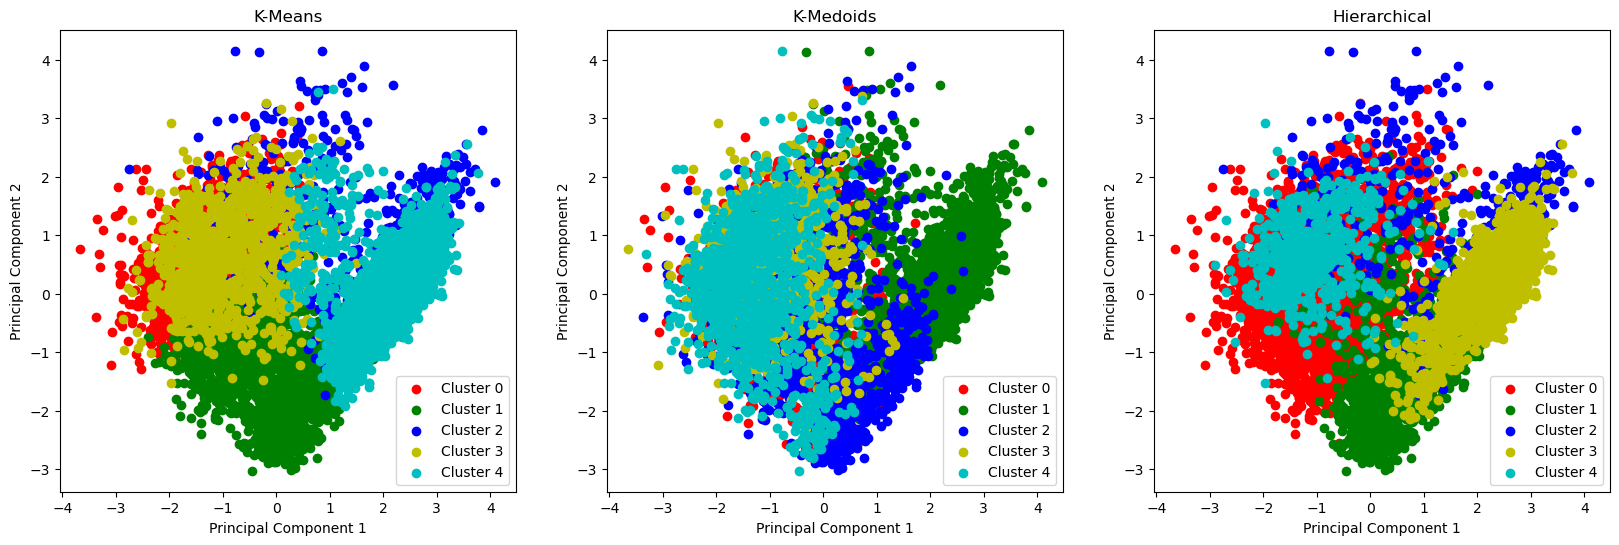

In [36]:
# Plot the scatter plots for each clustering algorithm
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
colors = ['r', 'g', 'b', 'y', 'c', 'm']
titles = ['K-Means', 'K-Medoids','Hierarchical']

for i, algorithm in enumerate(['KMeans', 'KMedoids', 'Hierarchical']):
    for j in range(num_clusters):
        axes[i].scatter(pca_df.loc[pca_df[algorithm] == j, 'principal component 1'],
                        pca_df.loc[pca_df[algorithm] == j, 'principal component 2'],
                        c=colors[j], label=f'Cluster {j}')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Principal Component 1")
    axes[i].set_ylabel("Principal Component 2")
    axes[i].legend()

plt.show()

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
# Calculate silhouette scores
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmedoids_silhouette = silhouette_score(data_scaled, kmedoids_labels)
hierarchical_silhouette = silhouette_score(data_scaled, hierarchical_labels)

In [39]:
print("Silhouette Scores:")
print(f"K-Means: {(kmeans_silhouette)*100}")
print(f"K-Medoids: {(kmedoids_silhouette)*100}")
print(f"Hierarchical: {(hierarchical_silhouette)*100}")

Silhouette Scores:
K-Means: 15.436914953704198
K-Medoids: 8.233117199789765
Hierarchical: 9.802558541130885
